### Convolutional Neural Networks (CNN)
- Powerful deep networks that is widely used in image related tasks like - Image recoginition, Segmentation, Computer Vision etc
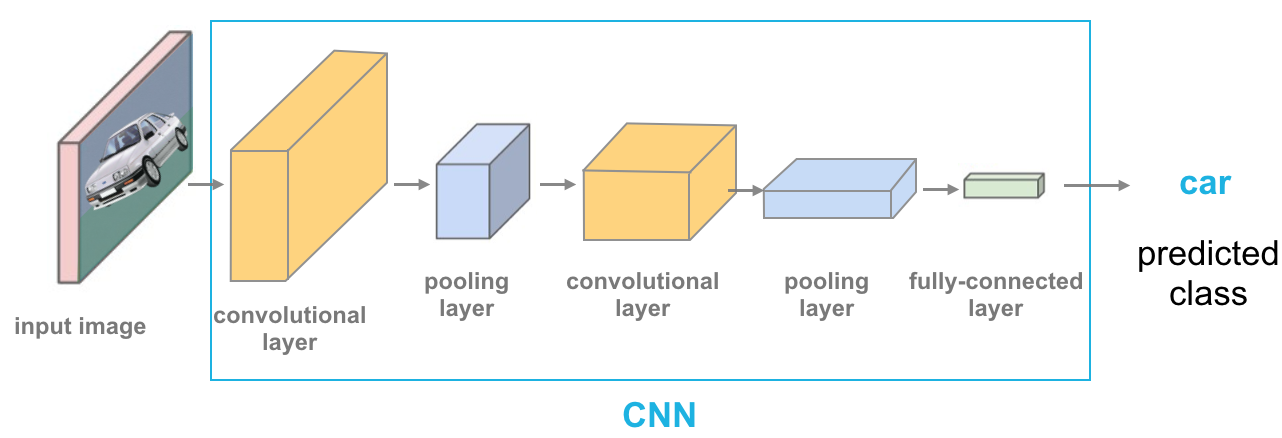

#### Why another type of Networks ?
- Problem with Multilayer Preceptrons(MLP's)
- $\textbf{Overfitting}$ due to many parameters(~ millions), while working with medium-large sized images!
- Fail to handle variance in image - Translation, rotation, illumination, size etc.

- **RGB Images have 3 channels, its like 3D image**
- **For 3 Channelled(28,28,3)  image we will use 3 channelled filter as (4X4X3) then on applying output we will get output as 28x28x1**

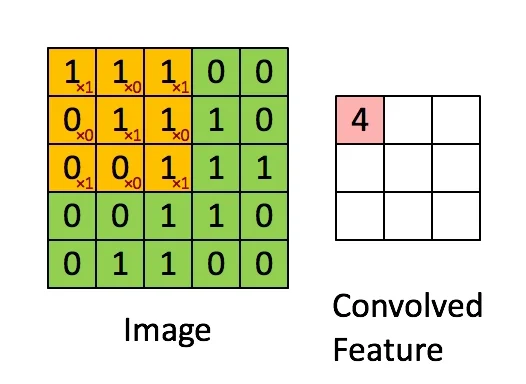

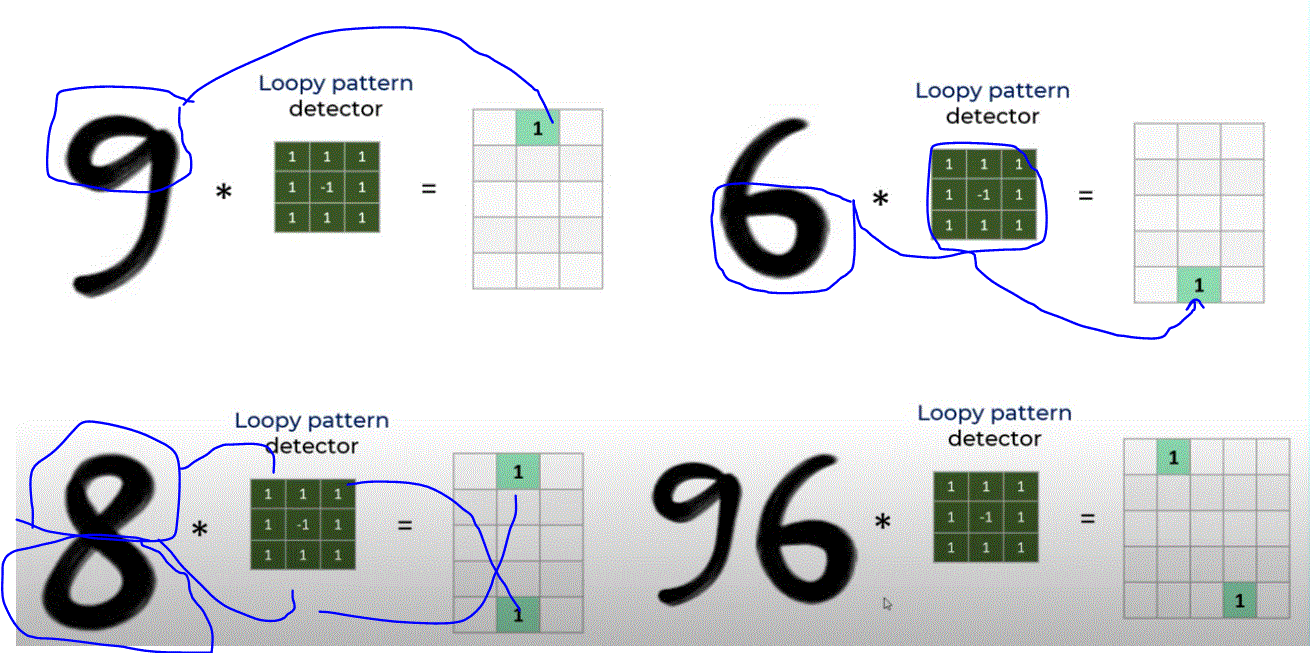

**This is example of Loopy filter to extract feature**
- There are other features as well like vertical line filter, diagonal line filter

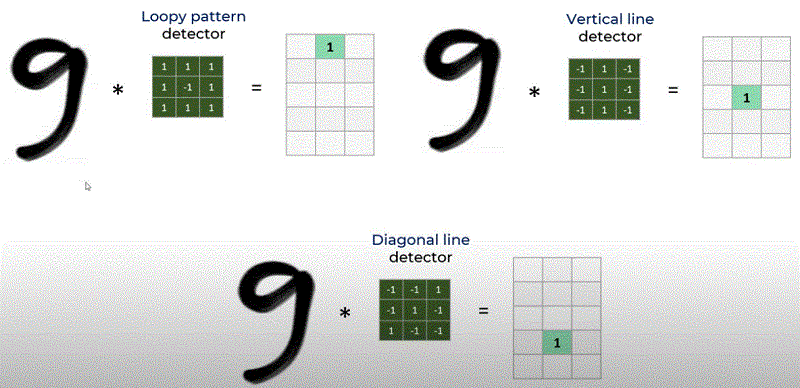
**On Applying 3 features filters**

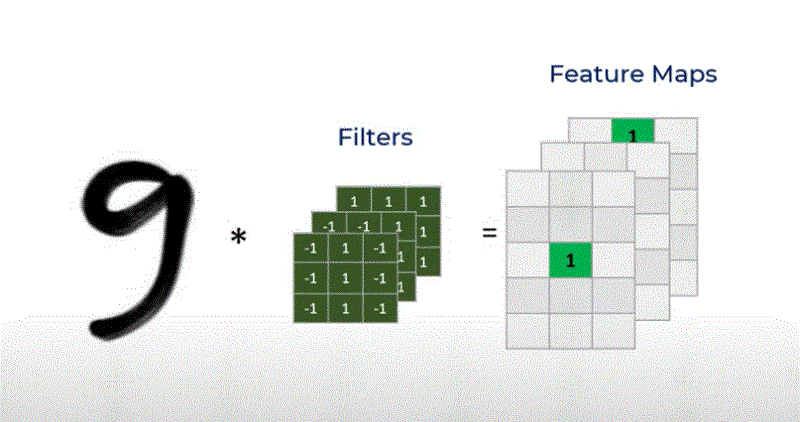

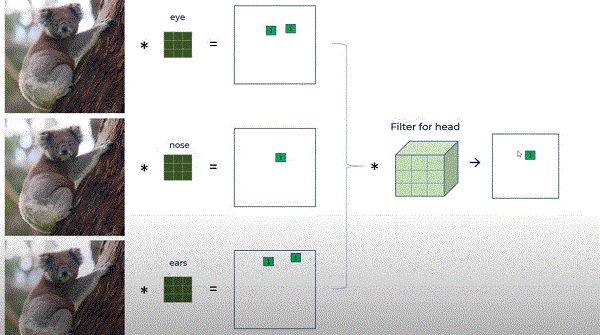

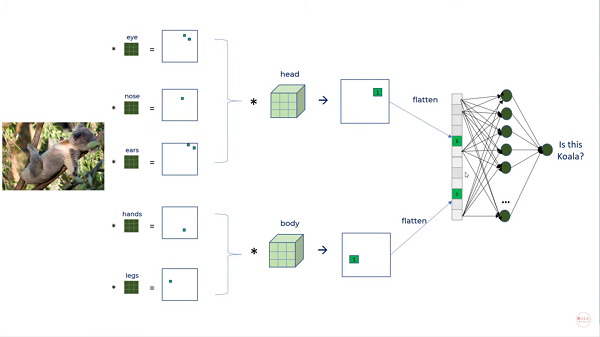

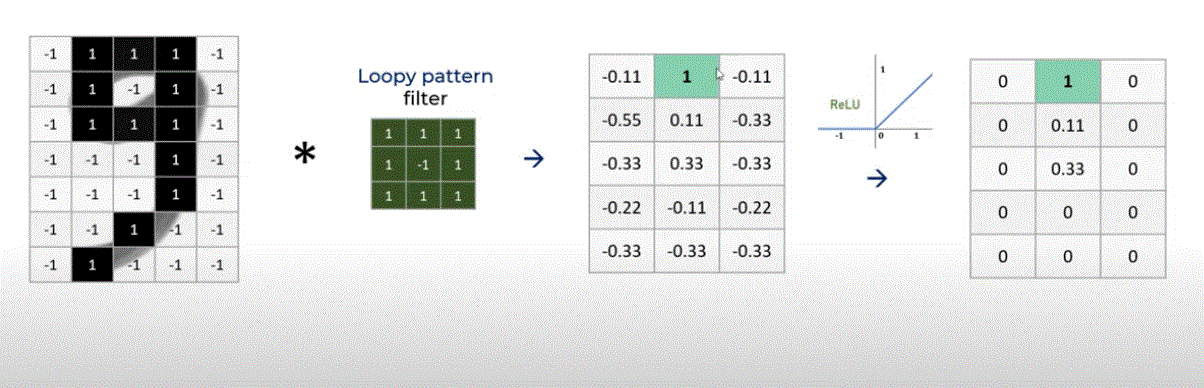
- **We still have problem of large image or overfitting**
- **Pooling Layer Is Used To Reduce The Image Size**

- **Stride Of 2 mean we Move 2 steps once we completed with the current Window**
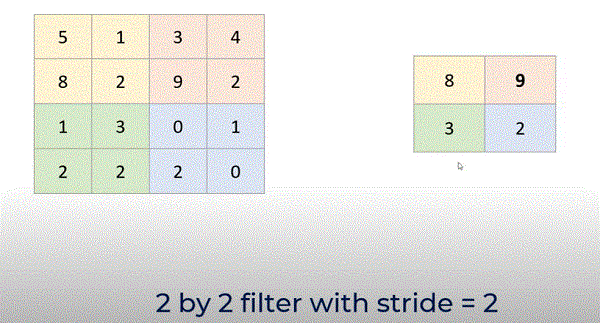

- **Stride of 1, here we use Max Pooling to reduces the size**
- **There Can be Average Pooling as well**
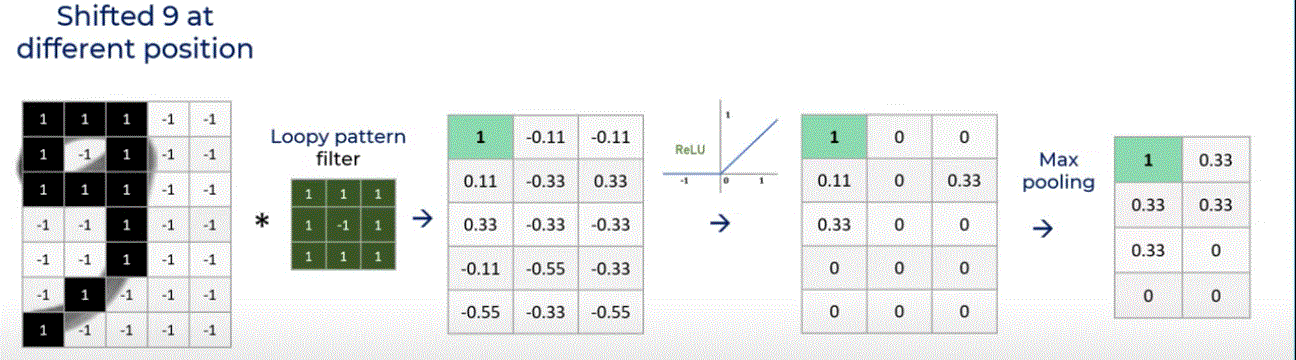

## Benefits Of Pooling 
- It reduces dimension and computation
- Reduces overfitting as there is less parameters
- Model is tolerant toward variation and distortion

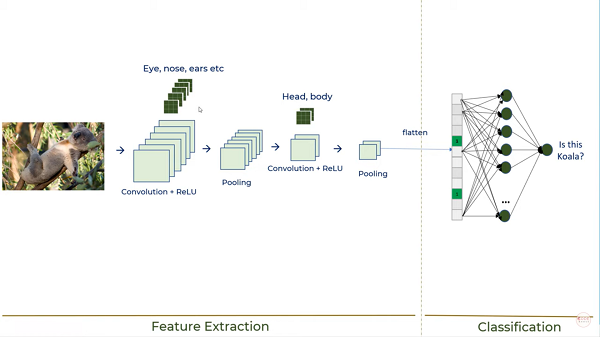

### Benefits of Convolution, Relu, Pooling
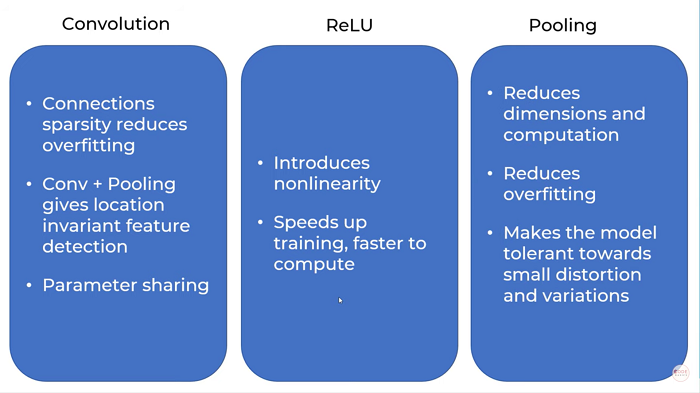

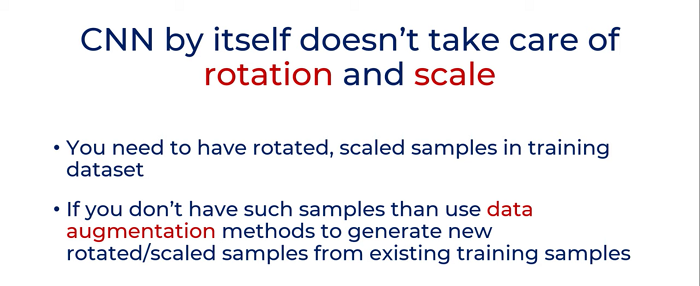

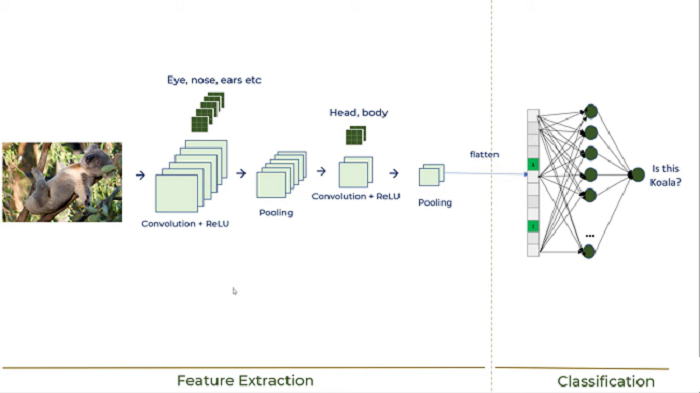

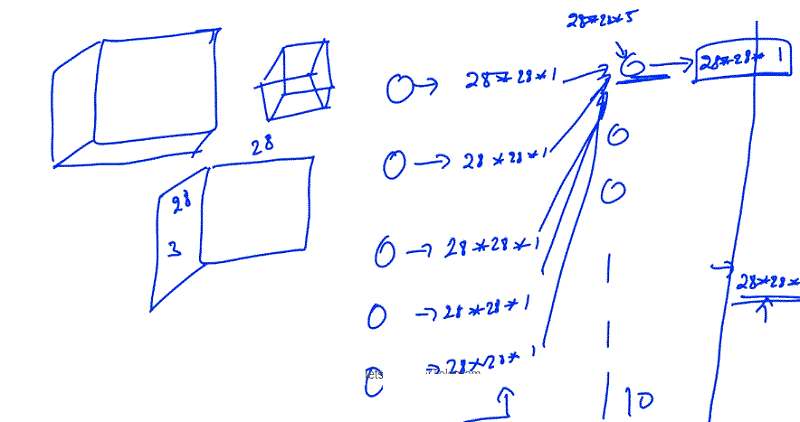

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def sigmoid(x):
#     return 1/ 1 + np.exp(-x)

In [3]:
# a1 = np.array([1,2,3,4,5])
# a2 = sigmoid(a1)
# a2

In [4]:
# a3 = sigmoid(a2)
# a3

In [5]:
# a4 = sigmoid(a3)
# a4

In [6]:
# a5 = sigmoid(a4)
# a5

In [7]:
# plt.figure(figsize = (16,10))
# plt.plot(a1)
# plt.plot(a2, color = 'black')
# plt.plot(a3, color = 'y')
# plt.plot(a4, color = 'b')
# plt.plot(a5, color = 'red')
# plt.show()

### Implementation [Blocks]

In [8]:
import cv2

In [9]:
def drawImg(img, title='Image'):
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.style.use('seaborn')
    plt.title(title + str(img.shape))
    plt.show()

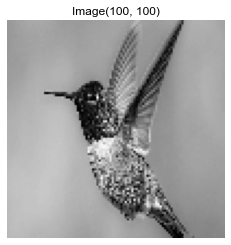

In [14]:
img = cv2.imread('./im.jpg')
# getting actual image
#------------------------------------------
img =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#------------------------------------------
img = cv2.resize(img, (100,100))
# to make our task we are converting it into greyscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
drawImg(img_gray)

In [15]:
# greyscale images have one channel only
# let there be an array of length N = 5 and the window of length F = 3, then
# 1 2 3 4 5
# |   |
#   |    |
#     |    |
# new array will be of size N - F + 1 = 5 - 3 + 1 = 3
# in convolution function we will move window and we will store scalar multplication
# size of feature map
# - Image is of size MxN
# - Filter matrix of size FxF
# - will be (M - F + 1) X (N - F + 1) 

In [16]:
a = np.array([2,3])
b = np.array([2,3])
np.dot(a,b) # (2*2):4 + (3*3):9 = 13

13

###  Understanding Filter AKA Kernel
- The filter is smaller than the input data and the type of multiplication applied between a filter-sized patch of the input and the filter is a dot product. A dot product is the element-wise multiplication between the filter-sized patch of the input and filter, which is then summed, always resulting in a single value. Because it results in a single value, the operation is often referred to as the “scalar product“.

- If the filter is designed to detect a specific type of feature in the input, then the application of that filter systematically across the entire input image allows the filter an opportunity to discover that feature anywhere in the image. This capability is commonly referred to as translation invariance, e.g. the general interest in whether the feature is present rather than where it was present.

- Once a feature map is created, we can pass each value in the feature map through a nonlinearity, such as a ReLU, much like we do for the outputs of a fully connected layer.


In [17]:
# hardcoded filter
# filter is what we  passes over input image to extract some features
# it say img_filter is of some weights w0,w1,w2.... for KxK size
# one putting this kXk filter on input image with pixel values as Pij
# then we do this from j = 0 to k-1 sum from i =0 to k-1 sum Pij*Wij
# we store these values into the array called Activation Map
def convolution(img, img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] 
    new_img = np.zeros((W-F+1, H-F+1))
    
    for row in range(W-F+1): # iterates over new_imge
        for col in range(H-F+1): # iterates over new_imge
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j] * img_filter[i][j]
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
    return new_img # Activation Map

In [18]:
print(img.shape) # colored image 3 channels
print(img_gray.shape) # 1 channels grey image

(100, 100, 3)
(100, 100)


In [60]:
filter1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
filter2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
filter3 = np.array([[3,2,1],[3,5,1],[1,0,1]])
filter4 = np.array([[11,0,1],[1,-3,1],[1,1,1]])
filter5 = np.array([[1,1,1],[1,-2,1],[1,1,1]])
filter6 = np.array([[1,0,1],[1,4,1],[1,1,1]])

In [61]:
blur_filter = np.ones((3,3))/9.0
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [62]:
output1 = convolution(img_gray,blur_filter)
print(output1.shape) # original size was 100,100 but new is 98,98 because of formula N - F + 1
output2 = convolution(img_gray, filter1)
print(output2.shape)
output3 = convolution(output2, filter2)
print(output3.shape)
output4 = convolution(output3, filter3)
print(output4.shape)
output5 = convolution(output4, filter4)
print(output5.shape)
output6 = convolution(output5, filter5)
print(output6.shape)
output7 = convolution(output6, filter6)
print(output7.shape)
output8 = convolution(output7, blur_filter)
print(output8.shape)

(98, 98)
(98, 98)
(96, 96)
(94, 94)
(92, 92)
(90, 90)
(88, 88)
(86, 86)


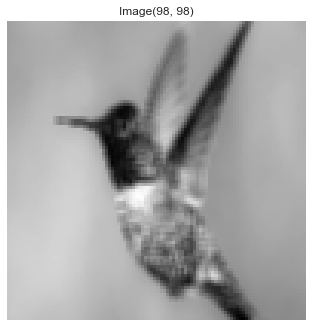

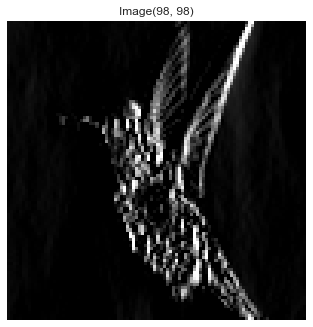

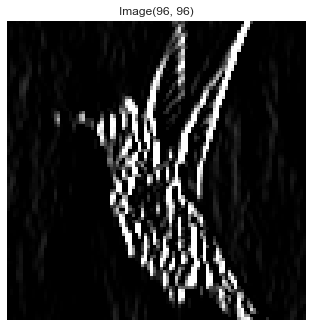

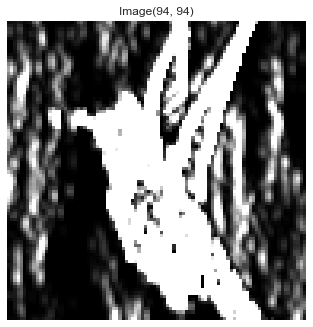

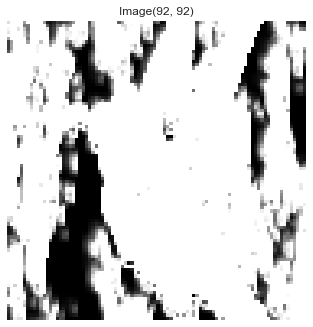

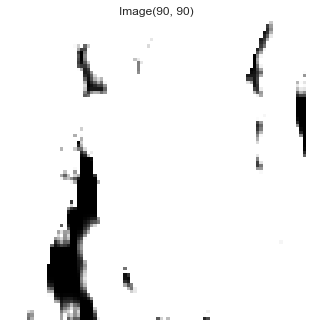

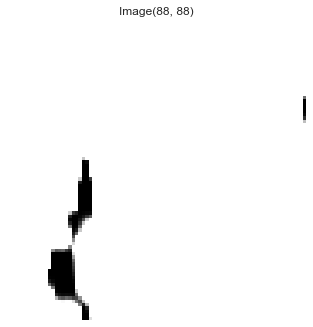

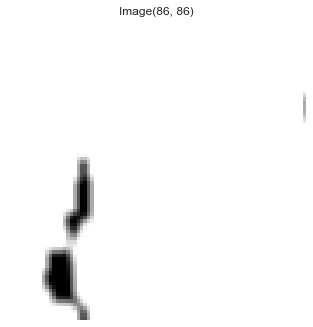

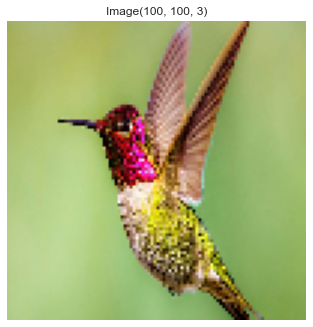

In [63]:
drawImg(output1) # blur filter, average of filter gives blur image
drawImg(output2)
drawImg(output3)
drawImg(output4)
drawImg(output5)
drawImg(output6)
drawImg(output7)
drawImg(output8)
drawImg(img)


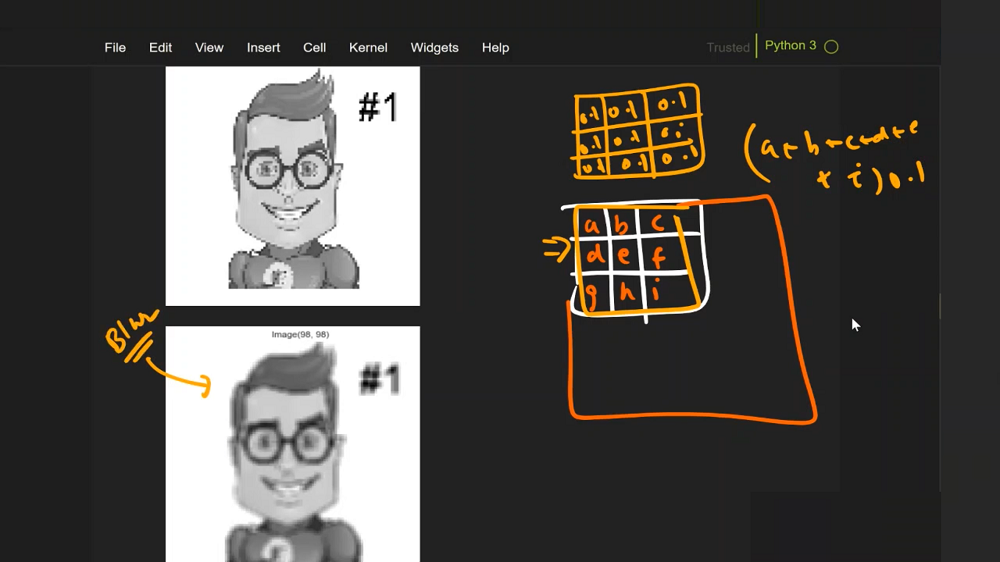

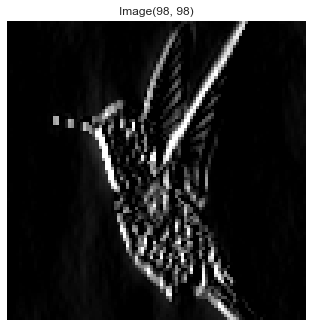

In [17]:
edge_filter = np.array(([1,0,-1],[1,0,-1],[1,0,-1]))
output1 = convolution(img_gray, edge_filter)
drawImg(output1) 

## Convolution Layer
### **Convolution Layer Contains various filters**
- Each filter extracts different kinds of feature and gives 1 activation map
- Muliple activation maps are combined by stacking to form output volume
- So CNN layer takes input a volume and produces an output volume of different shape.

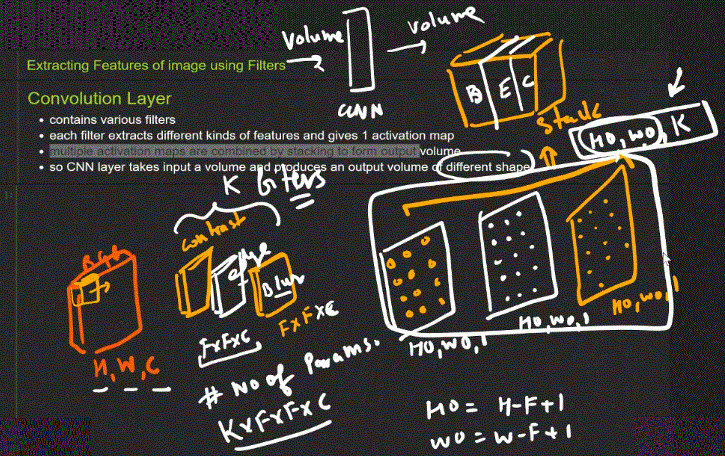

## Buzzwords In CNN's
- Convolution Layer
- Valid vs Same Convolution
- Padding 
- Stride
- Filter/Kernels
- Pooling (Average/Maxpooling)

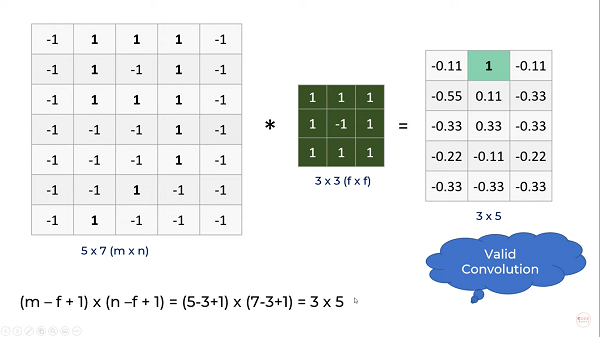

- Valid Convolution :- Corner pixels don't contribute as much in feature detection

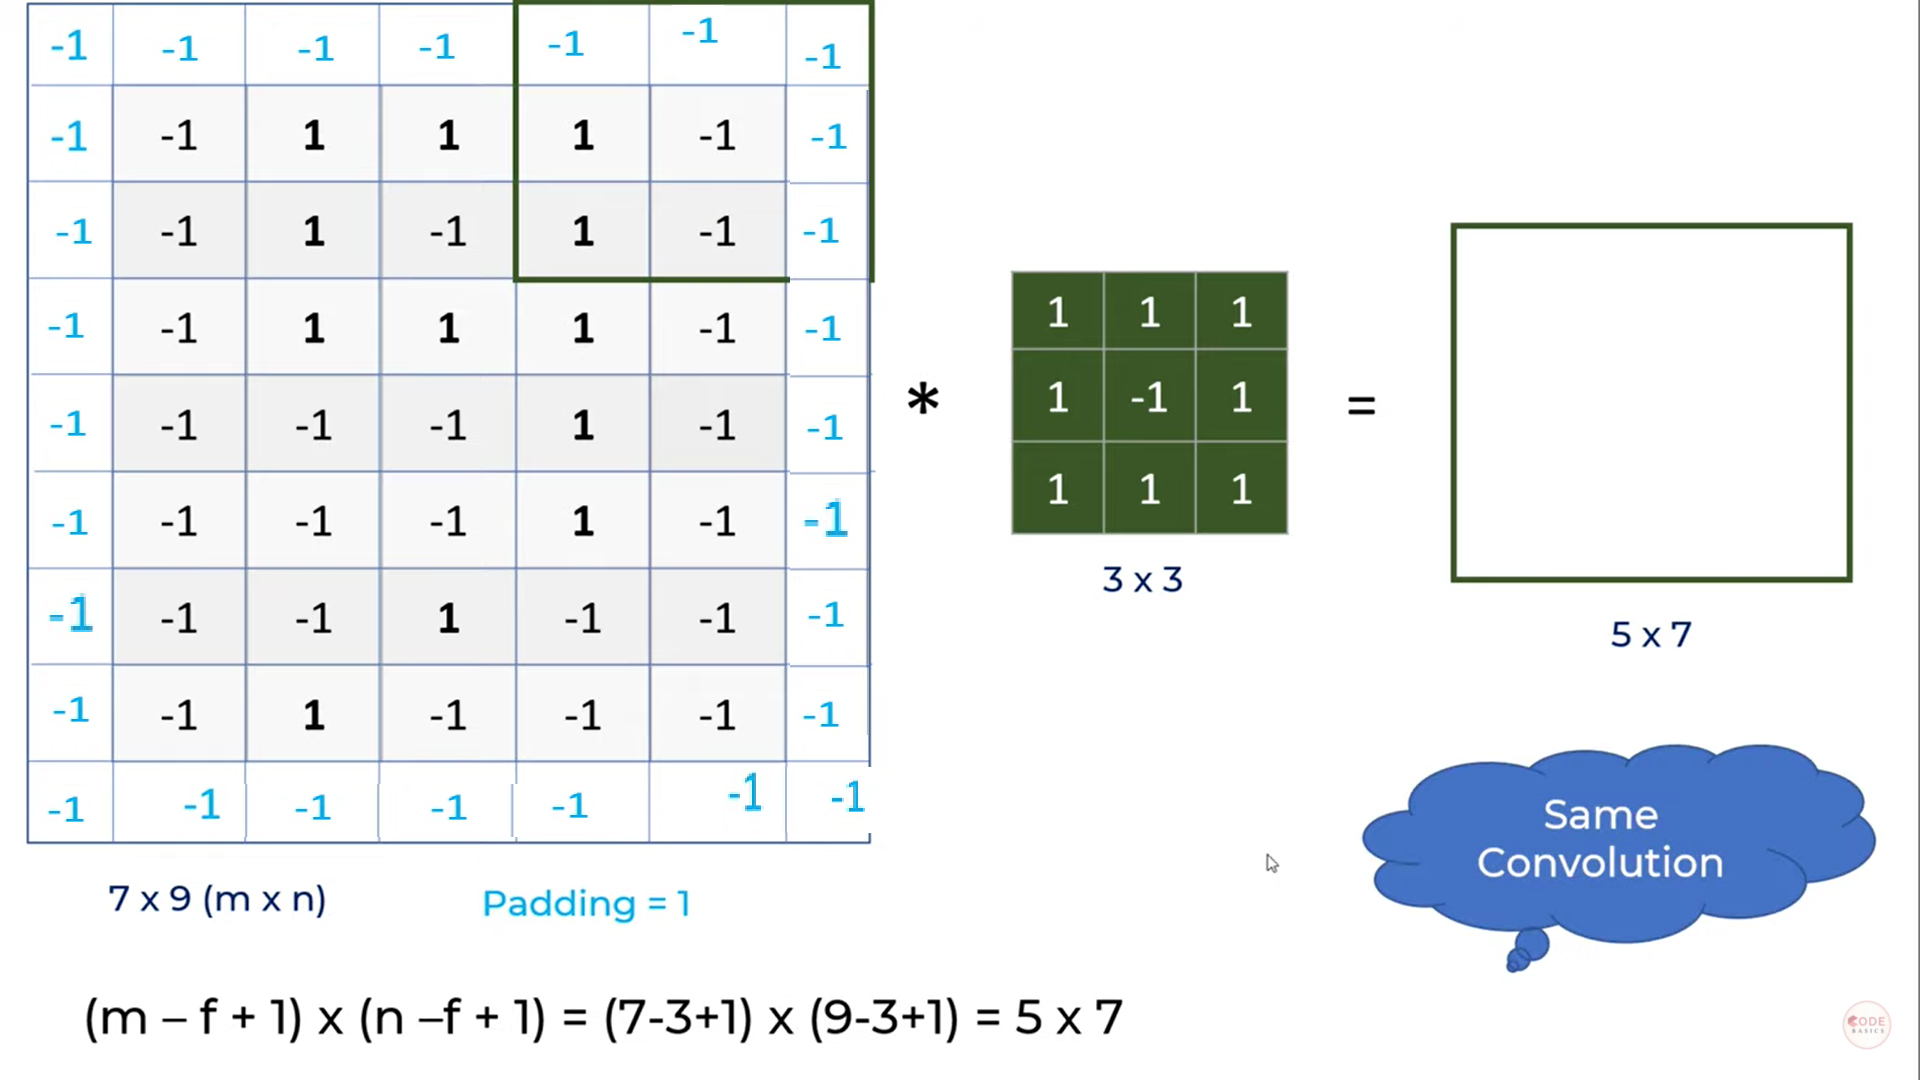


- Valid Convolution : No Padding
- Same Convolution : padd Scuh that output as same as input

## Stride
- Filter can have different size as well as movement
- Stride defines how a filter should move across the image
- No. of pixels we skip each time is called stride
- in our example we used a stride of (1,1) along W and H
- YOu can also use a stride of(2,2) in that case the output volume will have less W and H


### Padding Example
- Padding Using Numpy

(100, 100, 3)


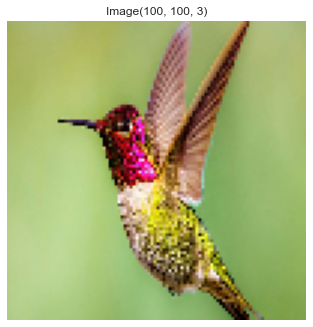

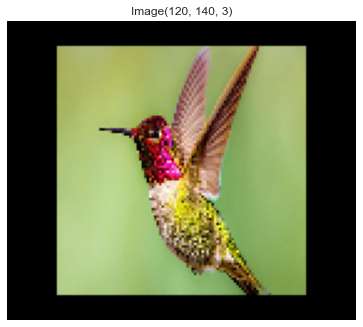

In [18]:
print(img.shape)
drawImg(img)
# padding to original image
pad_img = np.pad(img,((10,10),(20,20), (0,0)), 'constant',  constant_values = 0)
# 10,10 : rows, 20,20:columns, (0,0): channel,  constant_values = 0 is color
drawImg(pad_img)

## Pooling Layers

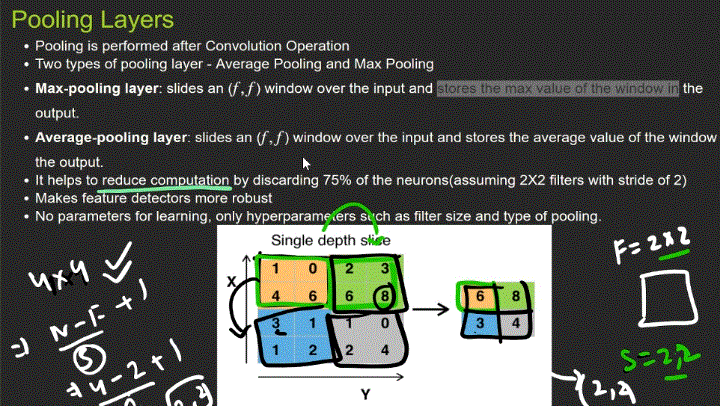

# Implementing Pooling

In [19]:
X = np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]])

def pooling(X,mode = 'max'):
    stride = 2
    f = 2
    H,W = X.shape
    # formula
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            X_slice = X[r_start: r_end, c_start:c_end]
            if mode == 'max':
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
    return output

In [20]:
pooling(X)

array([[6., 8.],
       [3., 4.]])

### DROPOUT
- Its as Regularization Technique
- We randomly turn off the node
- It is used to fix overfitting
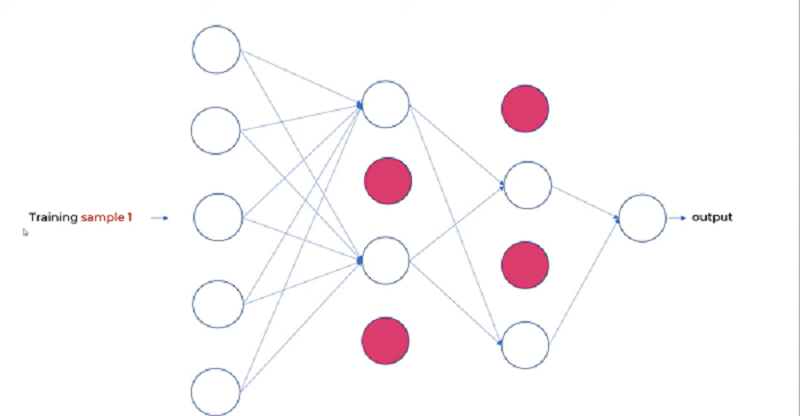

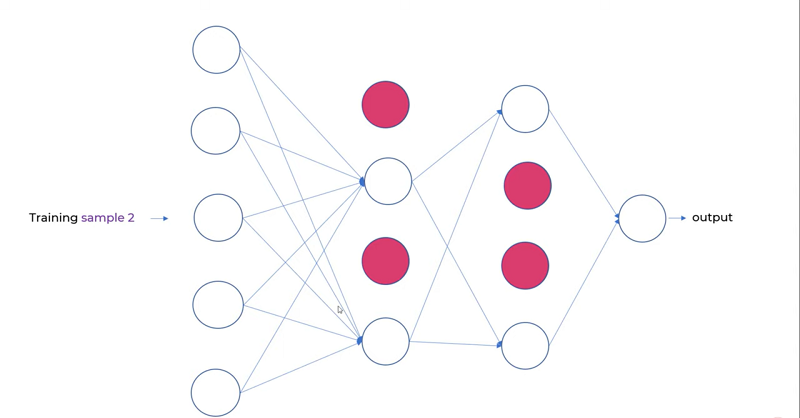

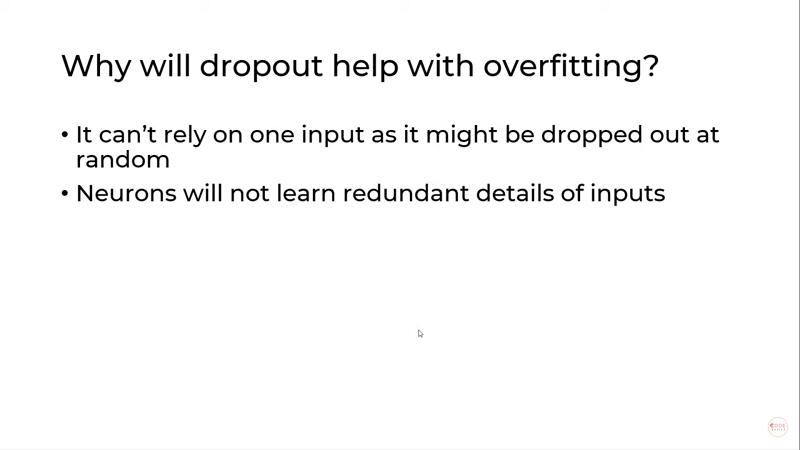

In [21]:
# Implementation

In [22]:
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv('./sonar_dataset.csv',header = None)
df.shape

(208, 61)

In [24]:
X = df.drop(60, axis = 'columns') 
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [25]:
X.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      50      51      52      53      54      55      56  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052  0.0044  
2  0.0164  0.0095  0.0078  
3  0.0044  0.0040  0.0117  
4  0.0048  0.0107  0.0094  

[5 rows x 60 columns]

In [26]:
y = pd.get_dummies(y, drop_first = True)
y.head()

R
0  1
1  1
2  1
3  1
4  1

In [27]:
y.value_counts()

R
0    111
1     97
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
model = keras.Sequential([
    
    keras.layers.Dense(60,input_dim = 60, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size= 8)

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5641
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5705
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5705
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.6218
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6610 - accuracy: 0.6474
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.6346
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6218
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6538
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.6795
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6474
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9679
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9679
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9872
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9936
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9808
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9744
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9808
Epoch 90/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9936
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9936
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9872
Epoch 93/100
